In [13]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


In [14]:
# Normalize pixel values between 0 and 1
train_images = train_images / 255
test_images = test_images / 255

In [15]:
# Flatten images , Reshaped from (60000,28,28) to (60000,784)

train_images = train_images.reshape(-1,28*28)
test_images = test_images.reshape(-1,28*28)

#Transposing the train_images to match dimesion size for dot product
train_images = train_images.T
print(train_images.shape)




(784, 60000)


In [28]:
#initializing
# neurons in first layer = 100
# neurons in output layer = 10

# W1 = weights for first hidden layer , b1 = biases for first layer
# W2 = weights for second layer , b2 = biases for second layer

def init_prams():
  W1 = np.random.rand(100,784)
  b1 = np.random.rand(100, 1)
  W2 = np.random.rand(10,100)
  b2 = np.random.rand(10,1)
  return W1,b1,W2,b2

#Activation functions

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



# Z1 = output of first layer without activation fucntion.
# A1 = activation fucntion applied on Z1.
# Z2 = output of second layer without activation fucntion.
# A2 = activation fucntion applied on Z2.

def forwared_prop(W1,b1,W2,b2,X):
  Z1 = W1.dot(X) +b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1 , A1 , Z2 ,A2

#derivative of relu used for back propogation
def deriv_RelU(Z):
  return Z>0
# one-hot encoding Y(test_labels)
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size , Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y
#  Backpropagation
def back_prop(Z1, A1, Z2, A2,W1, W2, X, Y):
    m = Y.size  # gives the size of y to m(60000)
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_RelU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2
# Updating parameters for both layers
def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1 , b1 , W2 , b2



In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_prams()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwared_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
W1, b1, W2, b2  = gradient_descent(train_images,train_labels, 0.10 , 100)

Iteration:  0
[3 9 1 ... 5 5 9] [5 0 4 ... 5 6 8]
0.1238
Iteration:  10
[4 0 4 ... 5 5 2] [5 0 4 ... 5 6 8]
0.50265
Iteration:  20
[5 0 4 ... 5 5 2] [5 0 4 ... 5 6 8]
0.6313
Iteration:  30
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.6949833333333333
Iteration:  40
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.7335
Iteration:  50
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.7605166666666666
Iteration:  60
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.7790333333333334
Iteration:  70
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.7937333333333333
Iteration:  80
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.8055333333333333
Iteration:  90
[5 0 4 ... 5 0 0] [5 0 4 ... 5 6 8]
0.81595


In [19]:
def init_prams():
  W1 = np.random.rand(100,784) - 0.5
  b1 = np.random.rand(100, 1) -0.5
  W2 = np.random.rand(10,100) -0.5
  b2 = np.random.rand(10,1) -0.5
  return W1,b1,W2,b2

In [20]:
np.random.rand(100,784) - 0.5


array([[ 0.25618376,  0.02910094, -0.22373019, ..., -0.14623368,
         0.10149221, -0.12784392],
       [-0.4460997 ,  0.39410624,  0.18441923, ..., -0.35353583,
         0.23282047,  0.05676061],
       [-0.00755206, -0.37388694,  0.11678603, ..., -0.3432741 ,
         0.29914465, -0.2304562 ],
       ...,
       [ 0.49404746, -0.32655795,  0.25888018, ..., -0.43614462,
         0.12758106, -0.34373404],
       [-0.02722383, -0.44550678,  0.04367352, ..., -0.00754023,
        -0.10658199, -0.17700567],
       [-0.08558614,  0.18962955,  0.17054263, ..., -0.14480051,
        -0.29994476,  0.19284414]])

In [21]:
np.random.rand(100,784)

array([[0.04411923, 0.25558191, 0.44215029, ..., 0.14555326, 0.79224757,
        0.25692119],
       [0.94435463, 0.40543936, 0.97581415, ..., 0.16271159, 0.79233641,
        0.88476495],
       [0.23731378, 0.71486481, 0.89535488, ..., 0.4800832 , 0.87716177,
        0.09805372],
       ...,
       [0.57800763, 0.93900256, 0.89267281, ..., 0.02145752, 0.83148543,
        0.01218217],
       [0.9907312 , 0.15264682, 0.8761768 , ..., 0.06989737, 0.30370675,
        0.39693432],
       [0.13012643, 0.70647821, 0.53942796, ..., 0.25650974, 0.89397872,
        0.71997561]])

In [22]:
import matplotlib.pyplot as plt


In [23]:
import matplotlib.pyplot as plt
def visualize_sample(X, Y, W1, b1, W2, b2, index):
    _, _, _, A2 = forwared_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, axis=0)

    sample = X[:, index].reshape(28, 28)  # Reshape the sample back to 28x28 for visualization
    predicted_label = predictions[index]
    actual_label = Y[index]  # Get the actual label

    plt.imshow(sample, cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}, Actual Label: {actual_label}")
    plt.show()

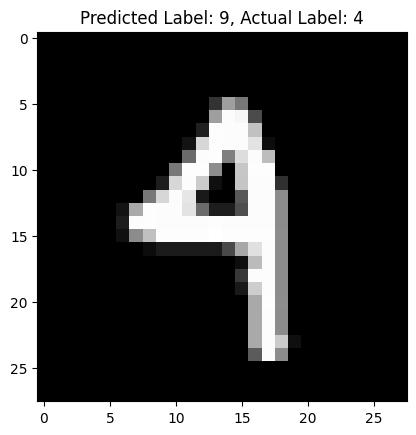

In [27]:
visualize_sample(test_images.T, test_labels, W1, b1, W2, b2, index=1453)